<a href="https://colab.research.google.com/github/katifrahim/Reducing-the-computational-demand-of-3D-CNNs/blob/main/3D_CNN_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install open3d
!pip install blosc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 17.7 MB/s eta 0:00:00


In [ ]:
import open3d as o3d
import numpy as np
import os
from google.colab import drive
import gc
import blosc
import torch
from torch.utils.data import Dataset, DataLoader

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Voxelization Method #1: Save all the arrays as npz files in their respective folders in google drive (This method works and requires very less memory)

voxel_size = 0.01
mesh_no = 0
directory = '/content/drive/MyDrive/ModelNet10'
save_directory = '/content/drive/MyDrive/ModelNet10_arrays'

# Iterating through the classes/ categories
for category in os.listdir(directory):
  category_path = os.path.join(directory, category)

  print(f'{category} Starting ...')

  # Iterating through the train and test folder
  for foldername in os.listdir(category_path):
    folder_path = os.path.join(category_path, foldername)

    # Iterating through the mesh objects
    for filename in os.listdir(folder_path):
      filepath = os.path.join(folder_path, filename)

      # Iterating through each file present in the train and test folder
      if filename.endswith('.off'):
        # loading mesh
        mesh = o3d.io.read_triangle_mesh(filepath)
        mesh.scale(1 / np.max(mesh.get_max_bound() - mesh.get_min_bound()), center=mesh.get_center()) # fit to unit cube

        # mesh to voxel grid
        voxel_grid = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh, voxel_size=0.01)

        # voxel grid to voxel coords
        voxels = voxel_grid.get_voxels()
        voxel_coords = np.zeros((len(voxels), 3)) # Initialize a NumPy array to store voxel coordinates
        for i, voxel in enumerate(voxels): # Extract x, y, z coordinates of each voxel and store in the NumPy array
          voxel_coords[i, 0] = voxel.grid_index[0]
          voxel_coords[i, 1] = voxel.grid_index[1]
          voxel_coords[i, 2] = voxel.grid_index[2]

        # voxel coords to voxel grid array (voxel array)
        common_grid_size = (100, 100, 100)  # Because the max_coords value we got is [100, 100, 100]
        voxel_grid_array = np.zeros(common_grid_size, dtype=int) # Initialize the 3D numpy array representing the voxel grid array
        voxel_coords = np.clip(voxel_coords, 0, np.array(common_grid_size) - 1) # Clip the voxel coordinates to the dimensions of the voxel grid array
        for coord in voxel_coords: # Map voxel coordinates to voxel grid indices and mark the corresponding voxels as occupied for each model
          x, y, z = coord.astype(int)
          voxel_grid_array[x, y, z] = 1  # Mark the voxel at coordinates (x, y, z) as occupied

        save_filename = filename.replace('.off', '.npz')
        save_path = os.path.join(save_directory, category, foldername, save_filename)
        np.savez_compressed(save_path, voxel_grid_array)

        mesh_no += 1
        print(f'Mesh number {mesh_no} done!')

        del mesh, voxel_grid, voxels, voxel_coords, voxel_grid_array, save_path
        gc.collect()

  print(f'{category} Done!')

toilet Starting ...
Mesh number 1 done!
Mesh number 2 done!
Mesh number 3 done!
Mesh number 4 done!
Mesh number 5 done!
Mesh number 6 done!
Mesh number 7 done!
Mesh number 8 done!
Mesh number 9 done!
Mesh number 10 done!
Mesh number 11 done!
Mesh number 12 done!
Mesh number 13 done!
Mesh number 14 done!
Mesh number 15 done!
Mesh number 16 done!
Mesh number 17 done!
Mesh number 18 done!
Mesh number 19 done!
Mesh number 20 done!
Mesh number 21 done!
Mesh number 22 done!
Mesh number 23 done!
Mesh number 24 done!
Mesh number 25 done!
Mesh number 26 done!
Mesh number 27 done!
Mesh number 28 done!
Mesh number 29 done!
Mesh number 30 done!
Mesh number 31 done!
Mesh number 32 done!
Mesh number 33 done!
Mesh number 34 done!
Mesh number 35 done!
Mesh number 36 done!
Mesh number 37 done!
Mesh number 38 done!
Mesh number 39 done!
Mesh number 40 done!
Mesh number 41 done!
Mesh number 42 done!
Mesh number 43 done!
Mesh number 44 done!
Mesh number 45 done!
Mesh number 46 done!
Mesh number 47 done!
Me

In [ ]:
# # Voxelization Method #2: Save all the arrays in a single npz file (This method works and requires very less memory)

# import os
# import numpy as np
# import open3d as o3d
# import blosc
# import gc

# voxel_size = 0.01
# mesh_no = 0
# ModelNet10_dict = {}
# directory = '/content/drive/MyDrive/ModelNet10'

# # Iterating through the classes/ categories
# for category in os.listdir(directory):
#     category_path = os.path.join(directory, category)

#     category_data = {'train': [], 'test': []}
#     print(f'{category} Starting ...')

#     # Iterating through the train and test folder
#     for foldername in os.listdir(category_path):
#         folder_path = os.path.join(category_path, foldername)

#         # Iterating through the mesh objects
#         for filename in os.listdir(folder_path):
#             filepath = os.path.join(folder_path, filename)

#             # Iterating through each file present in the train and test folder
#             if filename.endswith('.off'):
#                 # loading mesh
#                 mesh = o3d.io.read_triangle_mesh(filepath)
#                 mesh.scale(1 / np.max(mesh.get_max_bound() - mesh.get_min_bound()), center=mesh.get_center())  # fit to unit cube

#                 # mesh to voxel grid
#                 voxel_grid = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh, voxel_size=voxel_size)

#                 # voxel grid to voxel coords
#                 voxels = voxel_grid.get_voxels()
#                 voxel_coords = np.zeros((len(voxels), 3))  # Initialize a NumPy array to store voxel coordinates
#                 for i, voxel in enumerate(voxels):  # Extract x, y, z coordinates of each voxel and store in the NumPy array
#                     voxel_coords[i, 0] = voxel.grid_index[0]
#                     voxel_coords[i, 1] = voxel.grid_index[1]
#                     voxel_coords[i, 2] = voxel.grid_index[2]

#                 # voxel coords to voxel grid array (voxel array)
#                 common_grid_size = (100, 100, 100)  # Because the max_coords value we got is [100, 100, 100]
#                 voxel_grid_array = np.zeros(common_grid_size, dtype=int)  # Initialize the 3D numpy array representing the voxel grid array
#                 voxel_coords = np.clip(voxel_coords, 0, np.array(common_grid_size) - 1)  # Clip the voxel coordinates to the dimensions of the voxel grid array
#                 for coord in voxel_coords:  # Map voxel coordinates to voxel grid indices and mark the corresponding voxels as occupied for each model
#                     x, y, z = coord.astype(int)
#                     voxel_grid_array[x, y, z] = 1  # Mark the voxel at coordinates (x, y, z) as occupied

#                 compressed_data = blosc.compress(voxel_grid_array.tobytes(), clevel=9, shuffle=blosc.BITSHUFFLE, typesize=voxel_grid_array.itemsize)

#                 if foldername == 'train':
#                     category_data['train'].append(compressed_data)
#                 elif foldername == 'test':
#                     category_data['test'].append(compressed_data)

#                 mesh_no += 1
#                 print(f'Mesh number {mesh_no} done!')

#                 del mesh, voxel_grid, voxels, voxel_coords, voxel_grid_array, compressed_data
#                 gc.collect()

#     ModelNet10_dict[category] = category_data
#     print(f'{category} Done!')

# # Save the dictionary as a .npz file
# np.savez_compressed(f'ModelNet10.npz', **ModelNet10_dict)


toilet Starting ...
Mesh number 1 done!
Mesh number 2 done!
Mesh number 3 done!
Mesh number 4 done!
Mesh number 5 done!
Mesh number 6 done!
Mesh number 7 done!
Mesh number 8 done!
Mesh number 9 done!
Mesh number 10 done!
Mesh number 11 done!
Mesh number 12 done!
Mesh number 13 done!
Mesh number 14 done!
Mesh number 15 done!
Mesh number 16 done!
Mesh number 17 done!
Mesh number 18 done!
Mesh number 19 done!
Mesh number 20 done!
Mesh number 21 done!
Mesh number 22 done!
Mesh number 23 done!
Mesh number 24 done!
Mesh number 25 done!
Mesh number 26 done!
Mesh number 27 done!
Mesh number 28 done!
Mesh number 29 done!
Mesh number 30 done!
Mesh number 31 done!
Mesh number 32 done!
Mesh number 33 done!
Mesh number 34 done!
Mesh number 35 done!
Mesh number 36 done!
Mesh number 37 done!
Mesh number 38 done!
Mesh number 39 done!
Mesh number 40 done!
Mesh number 41 done!
Mesh number 42 done!
Mesh number 43 done!
Mesh number 44 done!
Mesh number 45 done!
Mesh number 46 done!
Mesh number 47 done!
Me

In [ ]:
## Voxelization Method #3: Save all the arrays in a single list (This method has not been completely tested because it requires more than 12.7GB)

# voxel_size = 0.01
# mesh_no = 0
# ModelNet10_arrays = []
# directory = '/content/drive/MyDrive/ModelNet10'

# # Iterating through the classes/ categories
# for category in os.listdir(directory):
#   category_path = os.path.join(directory, category)

#   train_test_array = []
#   print(f'{category} Starting ...')

#   # Iterating through the train and test folder
#   for foldername in os.listdir(category_path):
#     folder_path = os.path.join(category_path, foldername)

#     train_arrays = []
#     test_arrays = []

#     # Iterating through the mesh objects
#     for filename in os.listdir(folder_path):
#       filepath = os.path.join(folder_path, filename)

#       # Iterating through each file present in the train and test folder
#       if filename.endswith('.off'):
#         # loading mesh
#         mesh = o3d.io.read_triangle_mesh(filepath)
#         mesh.scale(1 / np.max(mesh.get_max_bound() - mesh.get_min_bound()), center=mesh.get_center()) # fit to unit cube

#         # mesh to voxel grid
#         voxel_grid = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh, voxel_size=0.01)

#         # voxel grid to voxel coords
#         voxels = voxel_grid.get_voxels()
#         voxel_coords = np.zeros((len(voxels), 3)) # Initialize a NumPy array to store voxel coordinates
#         for i, voxel in enumerate(voxels): # Extract x, y, z coordinates of each voxel and store in the NumPy array
#           voxel_coords[i, 0] = voxel.grid_index[0]
#           voxel_coords[i, 1] = voxel.grid_index[1]
#           voxel_coords[i, 2] = voxel.grid_index[2]

#         # voxel coords to voxel grid array (voxel array)
#         common_grid_size = (100, 100, 100)  # Because the max_coords value we got is [100, 100, 100]
#         voxel_grid_array = np.zeros(common_grid_size, dtype=int) # Initialize the 3D numpy array representing the voxel grid array
#         voxel_coords = np.clip(voxel_coords, 0, np.array(common_grid_size) - 1) # Clip the voxel coordinates to the dimensions of the voxel grid array
#         for coord in voxel_coords: # Map voxel coordinates to voxel grid indices and mark the corresponding voxels as occupied for each model
#           x, y, z = coord.astype(int)
#           voxel_grid_array[x, y, z] = 1  # Mark the voxel at coordinates (x, y, z) as occupied

#         if foldername == 'train':
#           train_arrays.append(voxel_grid_array)
#         elif foldername == 'test':
#           test_arrays.append(voxel_grid_array)

#         mesh_no += 1
#         print(f'Mesh number {mesh_no} done!')

#         del mesh, voxel_grid, voxels, voxel_coords, voxel_grid_array
#         gc.collect()

#     train_test_array.append([train_arrays, test_arrays])
#     del train_arrays, test_arrays
#     gc.collect()

#   ModelNet10_arrays.append(train_test_array)
#   del train_test_array
#   gc.collect()

#   print(f'{category} Done!')

In [ ]:
# Creating custom dataset and dataloader for the 3D CNN in pytorch using the data obtained from Voxelization Method #1

class VoxelGridDataset(Dataset):
  def __init__(self, root_dir, mode, transform=None):
    self.root_dir = root_dir
    self.mode = mode
    self.transform = transform
    self.file_paths = []
    self.categories = []
    self.category_to_index = {}
    self.index_to_category = {}

    categories = os.listdir(root_dir)
    categories.sort()

    for idx, category in enumerate(categories):
      self.category_to_index[category] = idx
      self.index_to_category[idx] = category

    for category in categories:
      category_path = os.path.join(root_dir, category)
      category_mode_path = os.path.join(category_path, mode)
      for file in os.listdir(category_mode_path):
        self.file_paths.append(os.path.join(category_mode_path, file))
        self.categories.append(category)

  def __len__(self):
    return len(self.file_paths)

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()

    voxel_grid_array = np.load(self.file_paths[idx])['arr_0']
    category = self.categories[idx]
    category_idx = self.category_to_index[category]

    if self.transform:
      voxel_grid_array = self.transform(voxel_grid_array)

    return voxel_grid_array, category_idx

class ToTensor(object):
  def __call__(self, voxel_grid_array):
    return torch.from_numpy(voxel_grid_array).float()

root_dir = '/content/drive/MyDrive/ModelNet10_arrays'

train_dataset = VoxelGridDataset(root_dir, mode='train', transform=ToTensor())
test_dataset = VoxelGridDataset(root_dir, mode='test', transform=ToTensor())

batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # shuffle is set true to prevent overfitting
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # shuffle is set false for accurate and consistent evaluation

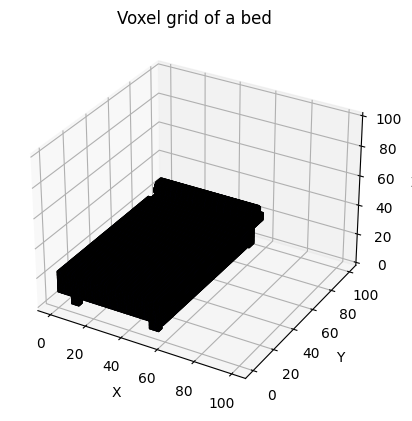

In [ ]:
# Confirming whether the dataset is accurate or not

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

index = 414
voxel_grid_tensor, category_idx = train_dataset[index]
voxel_grid_array = voxel_grid_tensor.numpy()
category = train_dataset.index_to_category[category_idx]

fig = plt.figure()
ax = plt.axes(projection='3d')
voxels = voxel_grid_array.astype(bool)
ax.voxels(voxels, facecolor='b', edgecolor='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Voxel grid of a {category}')
plt.show()

In [ ]:
# Confirming whether the dataloader works accurately or not

i = 0
for batch in train_dataloader:
  i += 1
  data, labels = batch
  if i == 1:
    if len(data) == len(labels):
      print(f'The data loader works accurately because there are exactly {len(data)} voxel grids and {len(labels)} labels(categories) in each batch and the batch size is {batch_size}')
    else:
      print(f'The data loader does not works accuratelt because there are {len(data)} voxel grids and {len(labels)} labels(categories) in each batch while the batch size is {batch_size}')
    break

The data loader works accurately because there are exactly 32 voxel grids and 32 labels(categories) in each batch and the batch size is 32
